Neural network can be simple. 

Everyone is familiar with high school line equation y = mx + b.  
The same is used in neural netowrk (nn).
In NN, the equation is writtne as y = wx + b (w=weights, b=bias)


In [1]:
import torch
from torch.autograd import Variable

# for graphing
import pandas as pd
import matplotlib
from plotnine import *
%matplotlib inline

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))

Lets predict the line

In [72]:
def makedf(y_data, epoch=0):
  # convert tensor to regular float numbers
  new_df = pd.DataFrame(list(zip(x_data, y_data)), columns =['x', 'y']).astype("float")
  new_df['epoch'] = epoch
  print(new_df)
  return(new_df)

def graph(df):
  return(ggplot(df)+aes(x='x',y='y',group='factor(epoch)', color='factor(epoch)')+geom_line())

     x    y  epoch
0  1.0  2.0      0
1  2.0  4.0      0
2  3.0  6.0      0


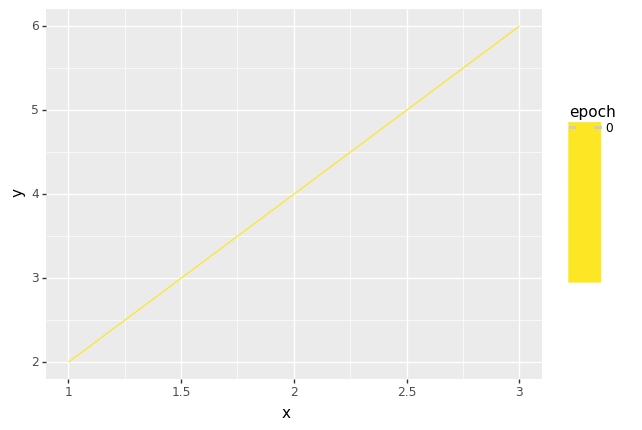

<ggplot: (8784882931580)>

In [21]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

The neurons are initialized with random w and b values

In [22]:
our_model = LinearRegressionModel()

In [23]:
def dump():
  for name, param in our_model.named_parameters():
    print(name)
    print(param.detach().numpy())

In [24]:
# MSE = Mean Square Error
criterion = torch.nn.MSELoss()  # mean is the default
# SDG = Stoastic Gradient Descent
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01)

In [54]:
def train(epoch): 
    # Forward pass: Compute predicted y by passing
    # debug to visualize
    dump()
    # x to the model
    pred_y = our_model(x_data)
    # Compute and print loss
    loss = criterion(pred_y, y_data)
    # Zero gradients, 
    optimizer.zero_grad()
    # accumulate (i.e. sum) the gradients  
    loss.backward()
    # and update the weights.
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))
    return(pred_y)


     x    y  epoch
0  1.0  2.0      0
1  2.0  4.0      0
2  3.0  6.0      0


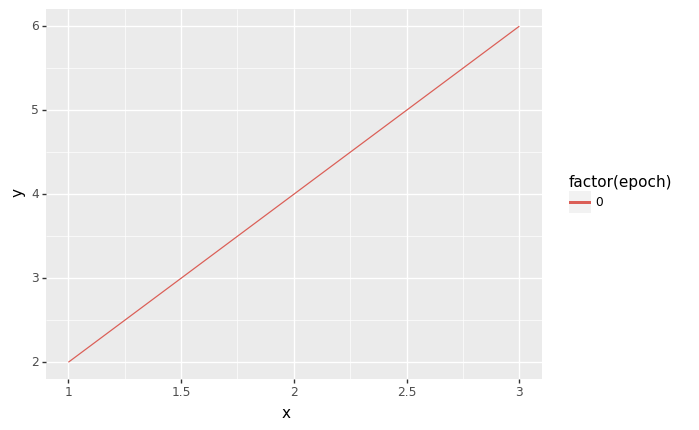

<ggplot: (8784887710961)>

In [75]:
epoch=1
df = makedf(y_data)
graph(df)

linear.weight
[[1.5494142]]
linear.bias
[0.4729161]
epoch 10, loss 0.31875455379486084
     x         y  epoch
0  1.0  2.022330     10
1  2.0  3.571744     10
2  3.0  5.121159     10


/var/folders/89/zsrk2wv555x6_m12xffd48700000gq/T/ipykernel_49731/2365158473.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


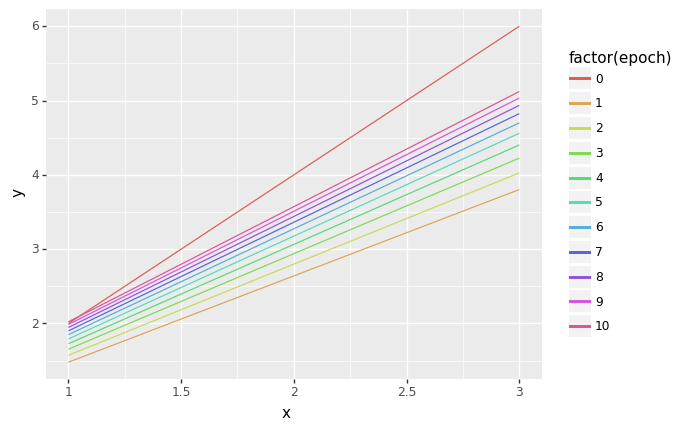

<ggplot: (8784886887006)>

In [74]:
x = train(epoch)
df = df.append(makedf(x,epoch=epoch))
epoch += 1
graph(df)

In [108]:
1 * 0.2175284 + 0.35684094

0.5743693400000001